# Implementing a Decision Tree Classifier

## Agenda

- Create and visualize a Decision Tree Classifier
- Utilize GridsearchCV to find the best hyperparameters of the model
- Discuss the role of Cross validation in the process

In [44]:
# Load libraries
import pandas as pd
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import make_scorer, accuracy_score #Import scikit-learn metrics module for accuracy calculation

from matplotlib import pyplot as plt


In [45]:
# Read in data and split data to be used in the models
titanic = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-062220-lectures/master/Mod_3/decision_trees/cleaned_titanic.csv', index_col='PassengerId')

# Create matrix of features
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

In [46]:
titanic

Survived  Pclass   Age  SibSp  Parch     Fare  youngin  male  Q  \
PassengerId                                                                    
1                   0       3  22.0      1      0   7.2500    False     1  0   
2                   1       1  38.0      1      0  71.2833    False     0  0   
3                   1       3  26.0      0      0   7.9250    False     0  0   
4                   1       1  35.0      1      0  53.1000    False     0  0   
5                   0       3  35.0      0      0   8.0500    False     1  0   
...               ...     ...   ...    ...    ...      ...      ...   ... ..   
887                 0       2  27.0      0      0  13.0000    False     1  0   
888                 1       1  19.0      0      0  30.0000    False     0  0   
889                 0       3  24.0      1      2  23.4500    False     0  0   
890                 1       1  26.0      0      0  30.0000    False     1  0   
891                 0       3  32.0      0      0   7.7500    False     1  1   

             S  
PassengerId     
1            1  
2            0  
3            1  
4            1  
5            1  
...         ..  
887          1  
888          1  
889          1  
890          0  
891          0  

[889 rows x 10 columns]

In [47]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()



Let's look at the default settings for this model

In [49]:
clf #splitter=best

DecisionTreeClassifier()

In [50]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.9841897233201581
Testing F1 Score: 0.7294117647058823


### OVERFIT TO THE TRAINING SET ^^^^^^^^^^

## Visualizing the decision tree

In [30]:
!brew install graphviz

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
alsa-lib                   libgccjit                  node@14
arturo                     libhandy                   numcpp
asroute                    libice                     openfst
bit-git                    libirecovery               openjdk@8
blaze                      libmnl                     or-tools
box2d                      libnetfilter-queue         ormolu
castget                    libnfnetlink               ox
cdktf                      libpciaccess               parallel-hashmap
clang-format@8             libpthread-stubs           pdm
cli11                      libseccomp                 periscope
cloudformation-guard       libslirp                   phive
commitizen                 libsm                      pickle
croc                       libx11                     podman
cvs-fast-export            libxau                     postgresql@12
dbdeployer  

fontexplorer-x-pro
fontgoggles
fontlab
fontplop
fork
forklift
foxitreader
foxmail
fractal-bot
fraise
framer
freac
free-download-manager
free-ruler
freecad
freedom
freemind
freenettray
freeorion
freeplane
freesmug-chromium
freetube
freeyourmusic
freeze
frescobaldi
frhelper
fritzing
fromscratch
front
fsnotes
funter
fuse
futuniuniu
fuwari
ganache
garagebuy
garagesale
gargoyle
gas-mask
gb-studio
gcollazo-mongodb
gdlauncher
geany
geekbench
geektool
gemini
geneious-prime
genymotion
geogebra
geotag
geph
gephi
get-backup-pro
get-iplayer-automator
get-lyrical
getrasplex
ghost-browser
gifox
gifrocket
gifs
gimp
gingko
gisto
git-it
gitee
gitfinder
gitfox
github
gitify
gitkraken
gitup
glance
gloomhaven-helper
glyphs
gmail-notifier
gns3
gnucash
go-agent
go-server
go64
gobdokumente
godot
gog-galaxy
goland
goldencheetah
golly
goodsync
goofy
google-chat
google-chrome
google-cloud-sdk
google-earth-pro
google-featured-photos
gopass-ui
gpg-suite-pinentry
gpodder
gpower
gpxsee
gqrx
grammarly
gramps
grandpe


==> Downloading https://homebrew.bintray.com/bottles/libpng-1.6.37.catalina.bott
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/c8e74da602c21f978cd7e
######################################################################## 100.0%#############################################################            86.9%
==> Downloading https://homebrew.bintray.com/bottles/freetype-2.10.4.catalina.bo
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/b4e7683ae202c49280024
######################################################################## 100.0%
==> Downloading https://homebrew.bintray.com/bottles/fontconfig-2.13.1.catalina.
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/64ff208b28613dfe2a65b
######################################################################## 100.0%
==> Downloading https://homebrew.bintray.com/bottles/jpeg-9d.catalina.bottle.tar
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/8f7b82a952fb3937889c7
#################################

######################################################################## 100.0%
==> Installing dependencies for graphviz: libpng, freetype, fontconfig, jpeg, libtiff, webp, gd, libffi, pcre, gdbm, openssl@1.1, readline, sqlite, xz, python@3.9, glib, jasper, netpbm, gts, libtool, lzo, pixman, cairo, fribidi, pkg-config, gobject-introspection, graphite2, icu4c, harfbuzz and pango
==> Installing graphviz dependency: libpng
==> Pouring libpng-1.6.37.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/libpng/1.6.37: 27 files, 1.2MB
==> Installing graphviz dependency: freetype
==> Pouring freetype-2.10.4.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/freetype/2.10.4: 64 files, 2.3MB
==> Installing graphviz dependency: fontconfig
==> Pouring fontconfig-2.13.1.catalina.bottle.tar.gz
==> Regenerating font cache, this may take a while
==> /usr/local/Cellar/fontconfig/2.13.1/bin/fc-cache -frv
🍺  /usr/local/Cellar/fontconfig/2.13.1: 531 files, 3.4MB
==> Installing graphviz dependency: jpeg
==> Pouring jpeg-9

==> Pouring libtool-2.4.6_2.catalina.bottle.tar.gz
==> Caveats
In order to prevent conflicts with Apple's own libtool we have prepended a "g"
so, you have instead: glibtool and glibtoolize.
==> Summary
🍺  /usr/local/Cellar/libtool/2.4.6_2: 71 files, 3.7MB
==> Installing graphviz dependency: lzo
==> Pouring lzo-2.10.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/lzo/2.10: 31 files, 546.7KB
==> Installing graphviz dependency: pixman
==> Pouring pixman-0.40.0.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/pixman/0.40.0: 14 files, 1.3MB
==> Installing graphviz dependency: cairo
==> Pouring cairo-1.16.0_3.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/cairo/1.16.0_3: 117 files, 5.7MB
==> Installing graphviz dependency: fribidi
==> Pouring fribidi-1.0.10.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/fribidi/1.0.10: 67 files, 609KB
==> Installing graphviz dependency: pkg-config
==> Pouring pkg-config-0.29.2_3.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/pkg-config/0.29.2_3: 11 files, 623.8KB
==> Installi

In [25]:
!pip install pydotplus

In [42]:
!pip install six

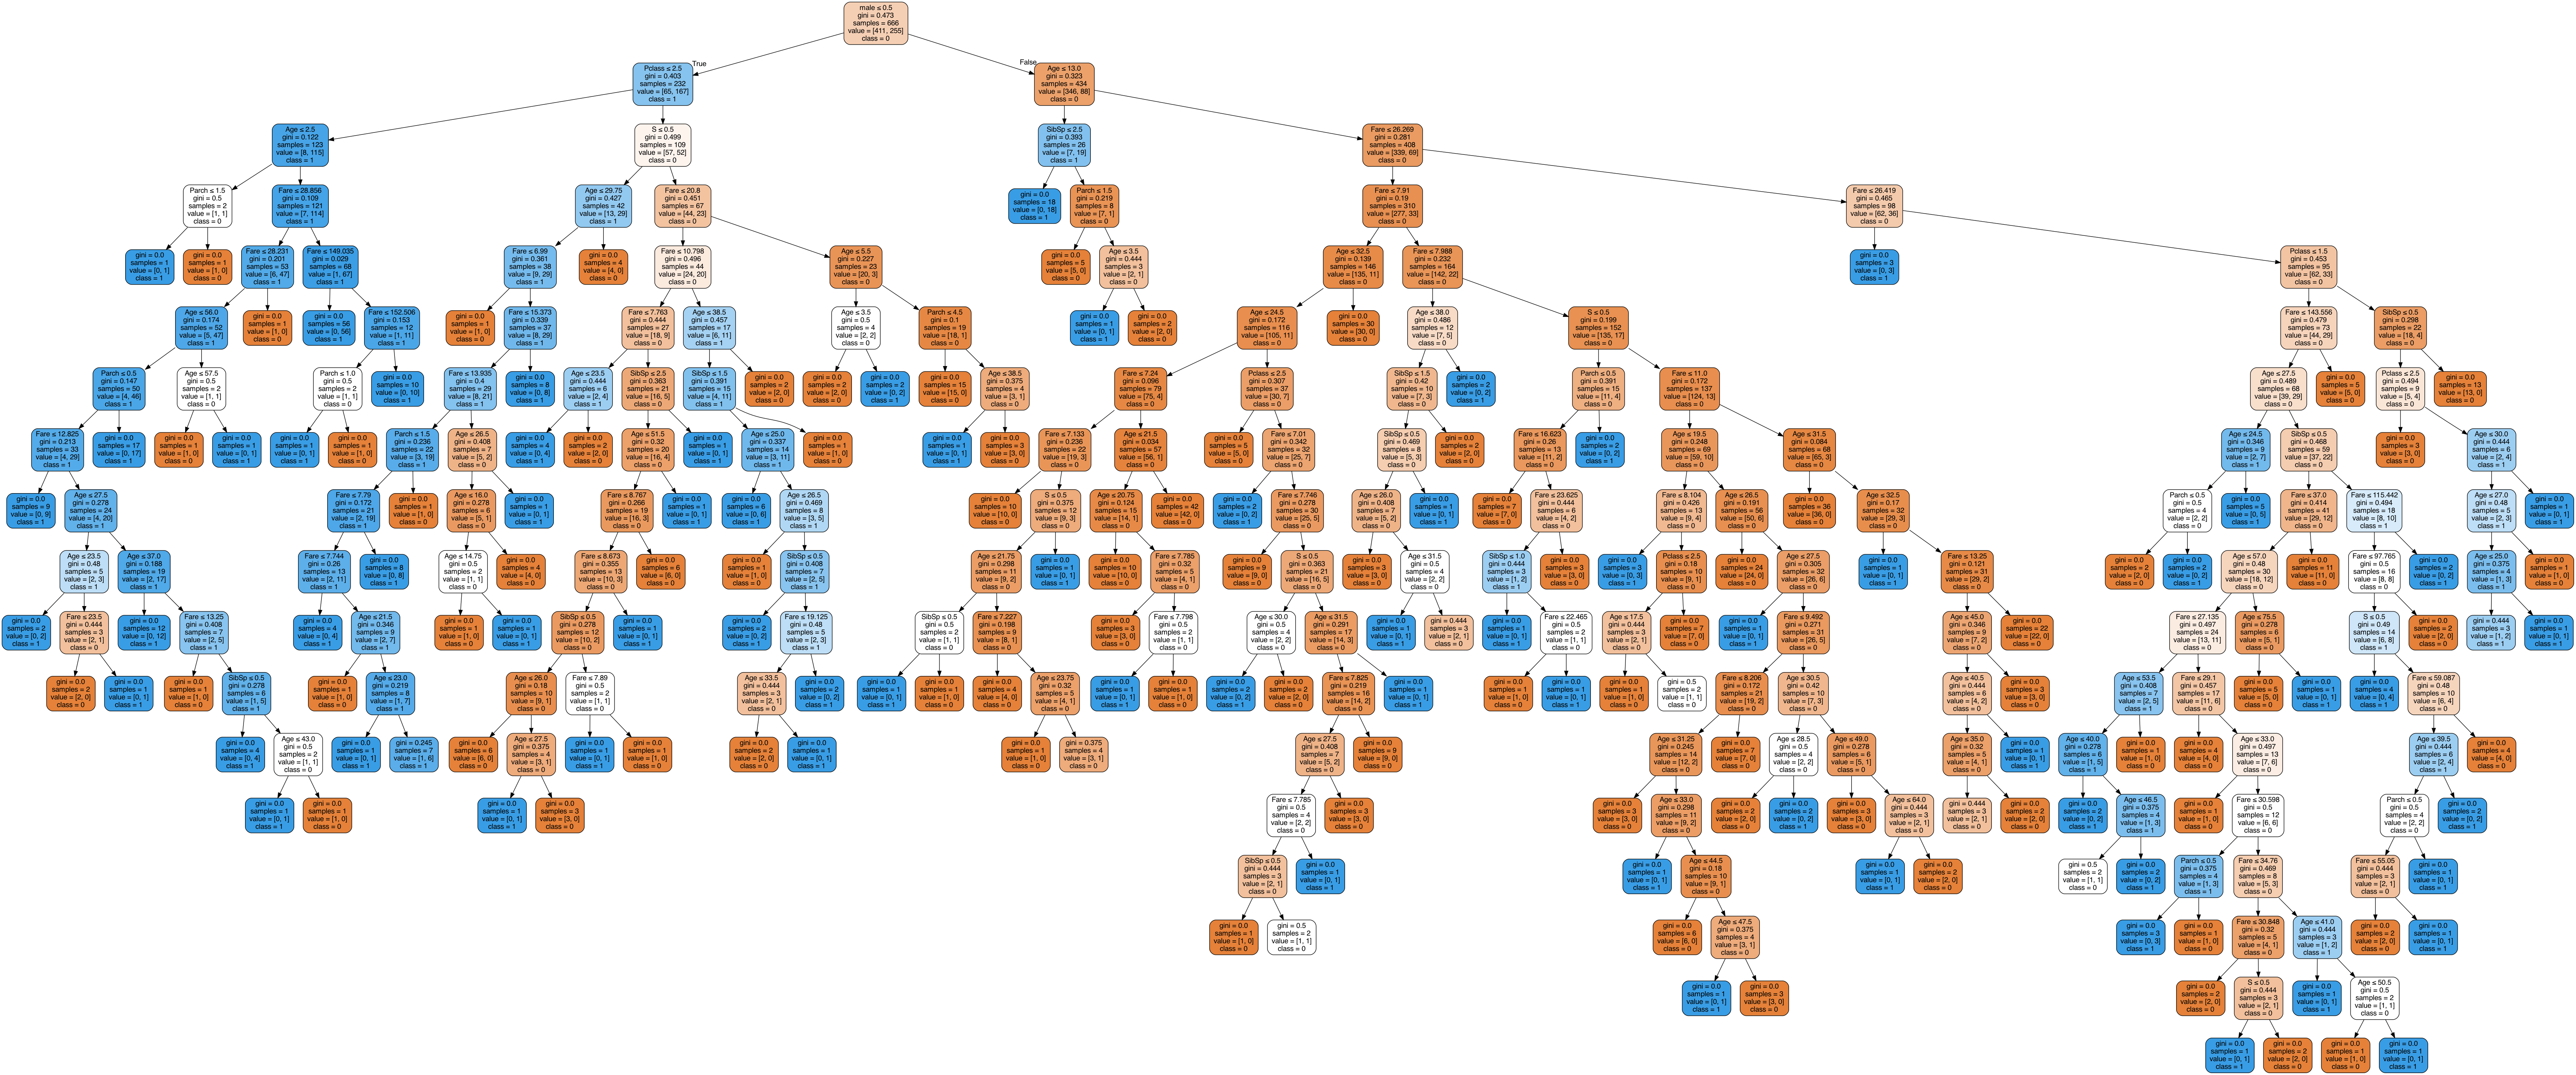

In [52]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

Let's create another tree but make it really short by setting max_depth=3

In [9]:
# Create Decision Tree classifer object 
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.7385321100917431
Testing F1 Score: 0.761904761904762


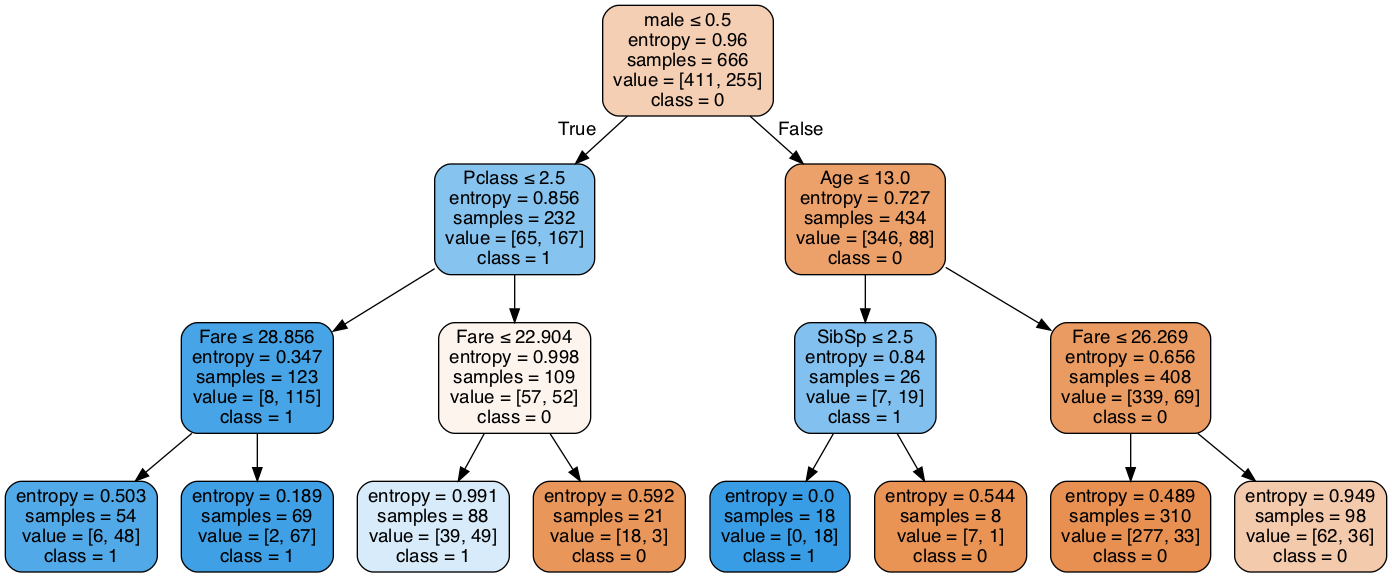

In [9]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic_depth3.png')
Image(graph.create_png())

**Using this visualization and the scoring metrics, write a sentence comparing the model with no restrictions to the model with `max_depth=3`**

answer:

## Tuning Hyperparameters

As you can see above, limiting the tree depth greatly improved our test performance and prevented our model from over fitting. 

- Is a max-depth of 3 the best parameter? 

- How would we figure this out?

In [53]:
# Import Grid search
from sklearn.model_selection import GridSearchCV



## Cross-Validation


Earlier we mentioned some of the potential issues with the train/test split method. In order to avoid this, we can perform something called **cross validation**. It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.


<img src='./images/tts_cv.png' /> 

In [54]:
DecisionTreeClassifier()

DecisionTreeClassifier()

### Create Parameter Candidates


Before looking for which combination of parameter values produces the most accurate model, we must specify the different candidate values we want to try. In the code below we have a number of candidate parameter values, including different values for min_samples_leaf and max_depth. The grid search will try all combinations of parameter values and select the set of parameters which provides the most accurate model.

In [83]:
# creating our parameters to test
# create a parameters dictionary that will loop over a range of 1-20 for the 'max_depth' parameter
parameters={'max_depth': range(1,21,1)} #'criterion':['gini', 'entropy']} #<--- remove this

In [84]:
list(range(1, 21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [85]:
parameters

{'max_depth': range(1, 21)}

In [86]:
#create our estimaor
dtc = DecisionTreeClassifier(random_state=1, criterion='entropy')

#create the instance of GridSearchCV
grid_tree = GridSearchCV(dtc, parameters, cv=10, scoring='f1', verbose=1, n_jobs=-1)

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.5s finished


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             n_jobs=-1, param_grid={'max_depth': range(1, 21)}, scoring='f1',
             verbose=1)

In [87]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.72110852400968
{'max_depth': 11}
DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=1)


F1 score 0.72110852400968

**Now let's take that best model and see how it does on our testing data**

In [88]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.6982248520710058


## Let's vizualize our best Decision Tree

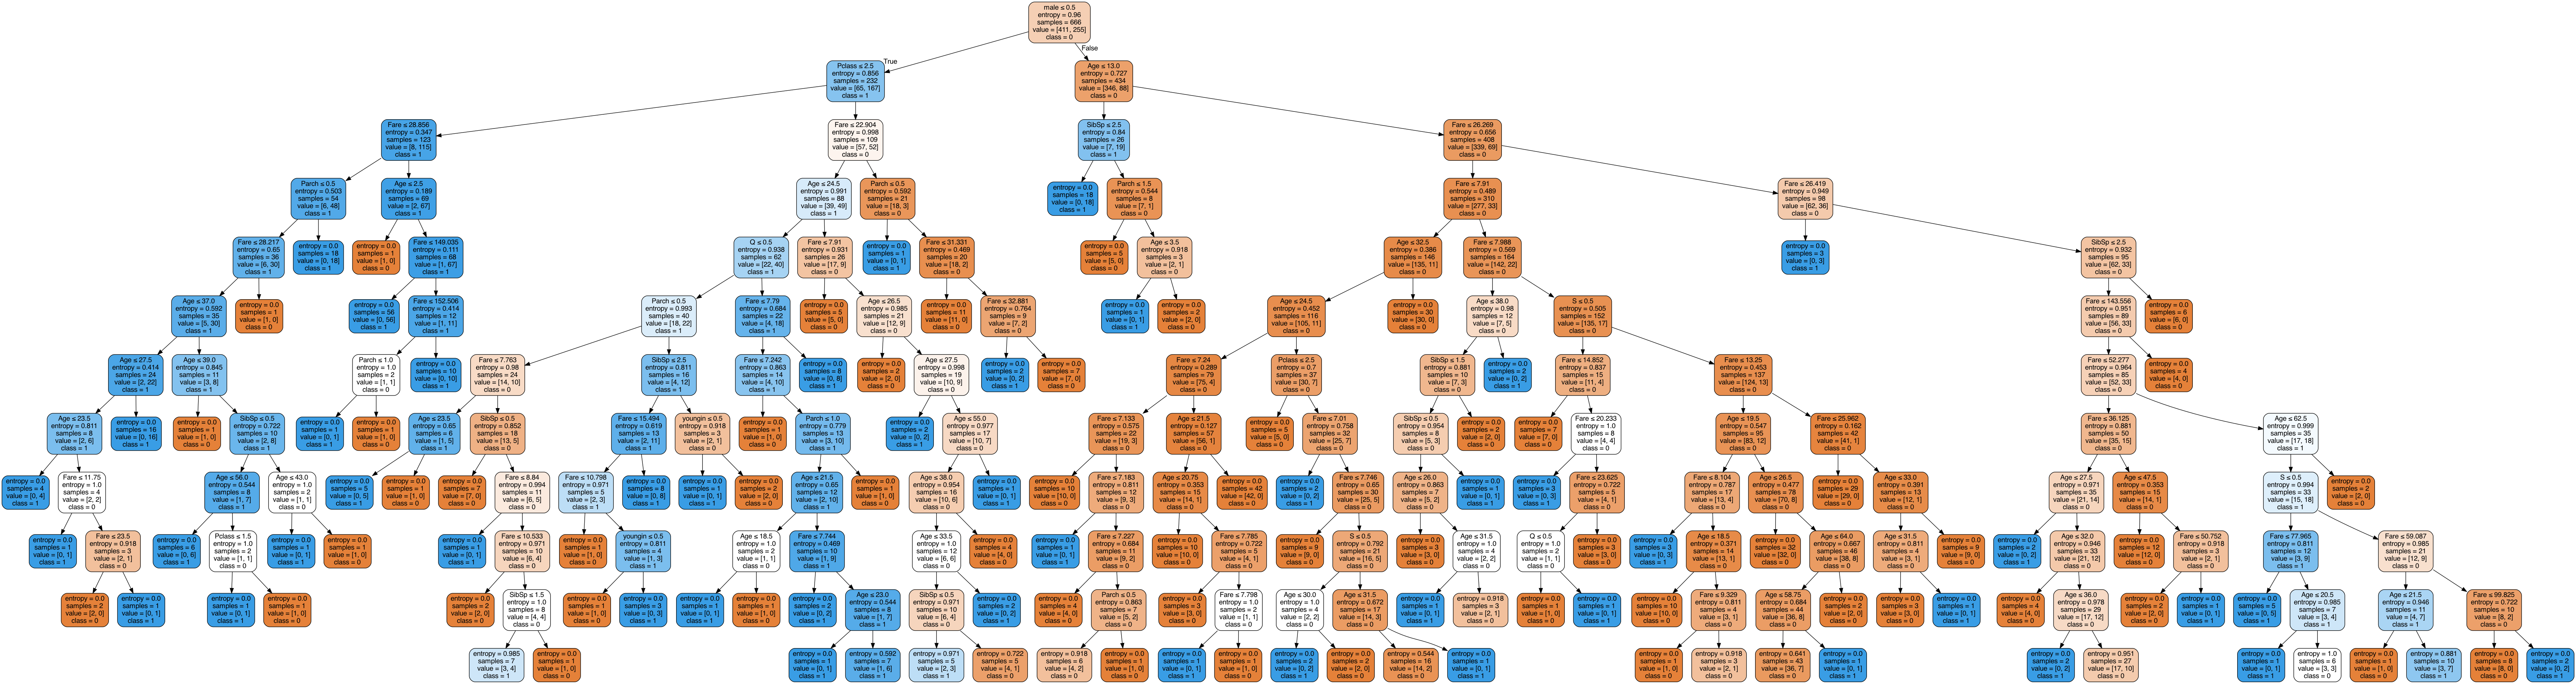

In [89]:
dot_data = StringIO()
export_graphviz(grid_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic_gs.png')
Image(graph.create_png())

## Working with different scorers

The grid search object allows you to score the different models using different scoring metrics. Look into the documentation and see which parameters allow you to do this.  

In [98]:
# GridSearchCV()

The scorers can be either be one of the predefined metric strings or a scorer callable, like the one returned by make_scorer

In [ ]:
def custom_scorer():
    #key is a title : value is a function/scoring 

In [92]:

scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy'}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid= parameters,
                  scoring=scoring, cv=10, refit='AUC', return_train_score=True)
gs.fit(X, y)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 21)}, refit='AUC',
             return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy'})

In [93]:
results = gs.cv_results_

In [94]:
results

{'mean_fit_time': array([0.00893111, 0.00672901, 0.0067934 , 0.00678272, 0.00810735,
        0.00633323, 0.00683682, 0.00766637, 0.00776303, 0.00738142,
        0.0076668 , 0.00771081, 0.00776734, 0.0073086 , 0.00882146,
        0.00846081, 0.00766501, 0.00764451, 0.00775421, 0.00900092]),
 'std_fit_time': array([0.00261725, 0.00068102, 0.00064184, 0.00069595, 0.00237797,
        0.00048972, 0.00064717, 0.001249  , 0.00141782, 0.00073947,
        0.00123224, 0.00103426, 0.00083802, 0.00075857, 0.00218493,
        0.0010143 , 0.00052146, 0.00097065, 0.00122525, 0.00189977]),
 'mean_score_time': array([0.01419833, 0.00786681, 0.01076894, 0.00833931, 0.00836349,
        0.00726597, 0.00744448, 0.00831761, 0.00803845, 0.00746143,
        0.00731306, 0.00906105, 0.00755708, 0.00739112, 0.00791037,
        0.00774391, 0.00786698, 0.00760348, 0.00838521, 0.00846424]),
 'std_score_time': array([0.00906251, 0.00062384, 0.00566548, 0.00239004, 0.00142968,
        0.00066764, 0.00058161, 0.001056

In [95]:
results['param_max_depth']

masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                   17, 18, 19, 20],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object)

## How the depth of the trees affects the  the bias versus variance tradeoff.

Below is a graph of the results across different `max_depth` values. 

In [96]:
import numpy as np

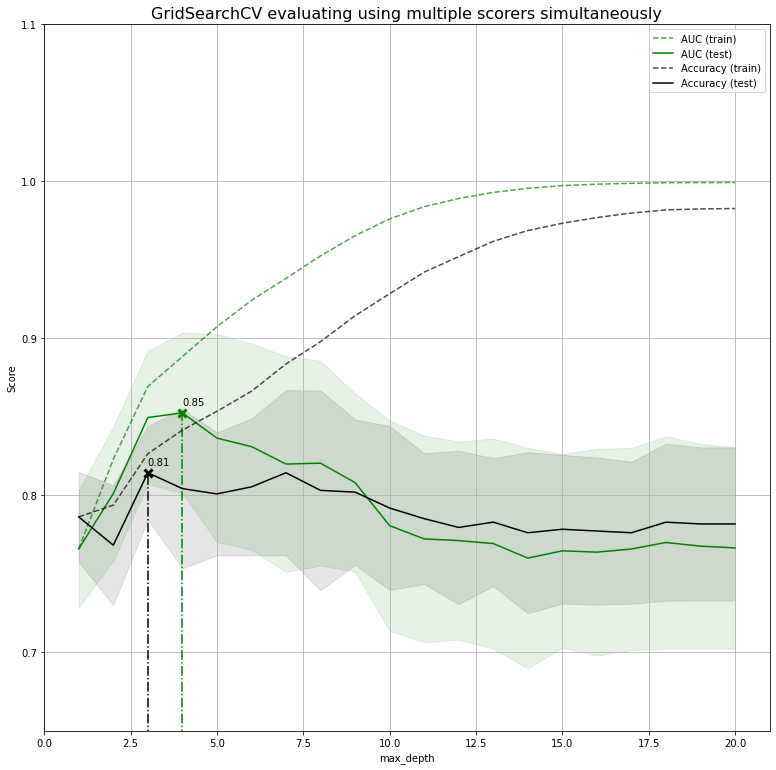

In [97]:
from matplotlib import pyplot as plt



plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("max_depth")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 21)
ax.set_ylim(0.65, 1.1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show();

What happens to our model as we allow it to grow to deeper? - TRAINING SET IS GETTING OVERFIT WHILE TEST IS WORSENING

___

## Your turn

Using the code examples from above, generate your own gridsearch model that tunes at least 3 different parameters for the decision tree. 


## Step 1:

Instantiate your classifier and set any parameters you want to be consistent across all model fittings

In [102]:
#create our estimator
decision_tree = DecisionTreeClassifier(random_state=1, criterion='entropy')


## Step 2:

Create the grid of parameters you want to test.

HOW MUCH DO WE ALLOWOUR TREE TO GROW

In [116]:
# creating our parameters to test
param_dict={'max_leaf_nodes': range(20,48,2),
            'min_samples_split': range(2,6,1),
            'max_depth': range(7,15,1)
           }
#PARAMS FROM THE DTC ABOVE


## Step 3 :
    
Create your GridSearch object and fit it

In [117]:

#create the instance of GridSearchCV using the F1 metric for our scoring. 
grid_tree = GridSearchCV(decision_tree, param_dict, cv=10, scoring='f1',verbose=1, n_jobs=-1)



In [118]:
#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

Fitting 10 folds for each of 448 candidates, totalling 4480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1304 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 3304 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 4480 out of 4480 | elapsed:   32.9s finished


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': range(7, 15),
                         'max_leaf_nodes': range(20, 48, 2),
                         'min_samples_split': range(2, 6)},
             scoring='f1', verbose=1)

## Step 4:

Identify the best performing model

In [119]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)



0.7332964971589846
{'max_depth': 14, 'max_leaf_nodes': 46, 'min_samples_split': 5}
DecisionTreeClassifier(criterion='entropy', max_depth=14, max_leaf_nodes=46,
                       min_samples_split=5, random_state=1)


**Now let's take that best model and see how it does on our testing data**

# Step 5: 

Evaluate that model against the test set

In [122]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.7283950617283951


# Step 6:

Using pickle, save the model to a file to use for later.  

In [123]:
import pickle 

In [124]:

  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(grid_tree.best_estimator_) 
  
# Load the pickled model 
# knn_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
# knn_from_pickle.predict(X_test) 